In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
classes = []
for i in range(58):
    classes.append('Col'+str(i))

data1 = pd.read_csv('spambase.data.csv', header=None, names=classes)

In [5]:
spam = data1[data1['Col57']==1]
valid = data1[data1['Col57']==0]

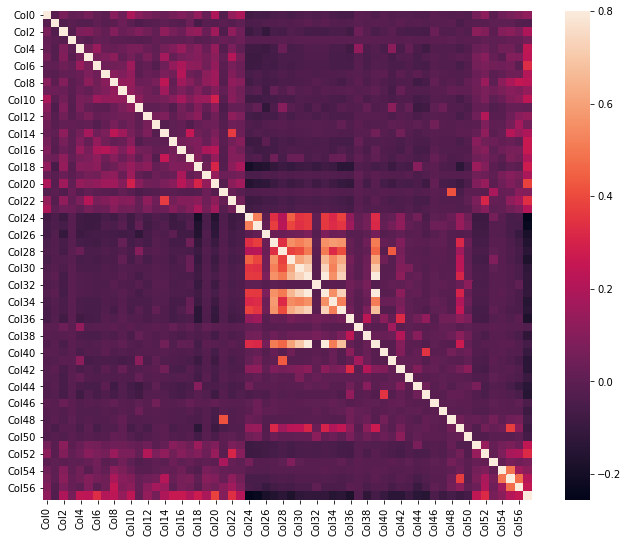

In [7]:
#Correlation matrix, there is high corr in some features around 24-42
corrmat = data1.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8, square = True)
plt.show()

In [9]:
columns = [c for c in classes if c not in ["Col57"]]

X = data1[columns]
y = data1["Col57"]
print(X.shape,y.shape,sep='\n')

(4601, 57)
(4601,)


In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [13]:
print('Score :',clf.score(X_test,y_test),'\n\n')
print('Accuracy score : ', accuracy_score(y_test,y_pred),'\n\n')
print('Classification report:\n',classification_report(y_test,y_pred))

Score : 0.9357080799304952 


Accuracy score :  0.9357080799304952 


Classification report:
              precision    recall  f1-score   support

          0       0.94      0.95      0.95       697
          1       0.92      0.91      0.92       454

avg / total       0.94      0.94      0.94      1151



Normalized confusion matrix :

[[0.94978479 0.05021521]
 [0.08590308 0.91409692]] 



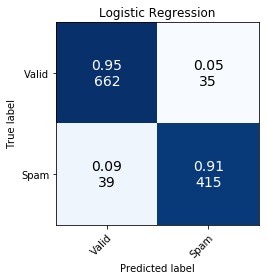

In [14]:
from sklearn.metrics import confusion_matrix

#ye sirf confusion matrix ko Graphical dikhane ke liye hai... else just print(cm) tak ka code hai

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_old = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix :\n")
    else:
        print('Confusion matrix, without normalization')

    print(cm,'\n')
#     print('Accuracy : ', (cm[0][0]+cm[1][1])/2,'\n')



    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i,str(format(cm[i,j], fmt))+'\n'+str(cm_old[i][j]), fontsize=14,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


classes = ['Valid','Spam']
cm = plot_confusion_matrix(y_test, y_pred, classes, normalize=True, title="Logistic Regression")

# Cross Validation

In [17]:
#each row ---> false +ve (i.e, cm[0][1]), false -ve(i.e, cm[1][0]), overall error rate (i.e, 1-accuracy)

# final row = average or mean of all error rates

In [19]:
from sklearn.model_selection import StratifiedKFold, KFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0) #Kfold gives overall error of 0.0724

print("Accuracy  F-pos   F-neg   Error rate")
errors = []

'''
either do the following, ya fir 'for' loop ke pehle hi X = X.values aur y = y.values karlo,
because default indexing of sklearn functions (like KFold) expect numpy arrays.
'''

for train,test in kfold.split(X,y):
    clf = LogisticRegression()
    clf = clf.fit(X.iloc[train],y.iloc[train])
    y_pred=clf.predict(X.iloc[test])
    score = accuracy_score(y.iloc[test],y_pred)
    cm = confusion_matrix(y.iloc[test], y_pred)
    fraction_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    errors.append(1-score)
    print("{0:.4f}   {1:.4f}   {2:.4f}   {3:.4f}".format(score, fraction_cm[0][1], fraction_cm[1][0], (1-score)))

errors = np.array(errors)
print("Overall Error rate : {0:.4f}".format(errors.mean()))

Accuracy  F-pos   F-neg   Error rate
0.9306   0.0358   0.1209   0.0694
0.9566   0.0287   0.0659   0.0434
0.9154   0.0609   0.1209   0.0846
0.9043   0.0968   0.0939   0.0957
0.9326   0.0430   0.1050   0.0674
0.9261   0.0573   0.0994   0.0739
0.9283   0.0251   0.1436   0.0717
0.9348   0.0358   0.1105   0.0652
0.9368   0.0360   0.1050   0.0632
0.9237   0.0719   0.0829   0.0763
Overall Error rate : 0.0711
